In [41]:
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from typing import List, Tuple
import string
from os import walk
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,matthews_corrcoef,roc_curve, auc
import seaborn as sns

In [42]:
!pwd

/Users/rohan/Desktop/DTI_setup/cmap_analysis


In [55]:
filenames = next(walk('/Users/rohan/Desktop/DTI_setup/cmap_analysis/gt/'), (None, None, []))[2]

In [48]:
def getCmaps(file,path):
    gt=np.load(path+'gt/'+file)
    esm=np.load(path+'esm_cmaps/'+file)
    alpha=np.load(path+'alpha_fold_cmaps/'+file)
    pcons=np.load(path+'pconsc4/'+file)
    pcons=pcons >= 0.5
    pcons=np.multiply(pcons,1)
    #rand=np.load(path+'esm/'+file)
    #rand=np.load(path+'rand_cmaps/'+file)
    return gt,alpha,esm,pcons

In [52]:
gt,alpha,esm,pcons,rand=getCmaps('P24941.npy','/Users/rohan/Desktop/contact_map_analysis/kiba_cmaps/')

In [45]:
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='bold',fontsize=35,ha='center',va='bottom')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')
    
def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [56]:
files= [
 'P19784.npy',
 'P24941.npy',
 'P50750.npy',
 'Q16539.npy',
 'P06493.npy',
 'Q00535.npy',
 'O43741.npy']

In [56]:
results_path = "/Users/rohan/Desktop/DTI_setup/cmap_analysis/results/"

In [57]:
def calculate_metrics(gt, contact_map):
    L=gt.shape[0]
    gt = gt.flatten()
    contact_map = contact_map.flatten()
    mcc = matthews_corrcoef(gt, contact_map)
    f1= f1_score(gt, contact_map)
    precision = precision_score(gt, contact_map, zero_division=0)
    return mcc,f1, precision




In [58]:
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef, f1_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define paths and files
results_path = "/Users/rohan/Desktop/DTI_setup/cmap_analysis"


# Define a function to calculate metrics
def calculate_metrics(gt, contact_map):
    L = gt.shape[0]
    gt = gt.flatten()
    contact_map = contact_map.flatten()
    mcc = matthews_corrcoef(gt, contact_map)
    f1 = f1_score(gt, contact_map)
    precision = precision_score(gt, contact_map, zero_division=0)
    return mcc, f1, precision

# Define lists to store the results for each method
methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4"]
all_results = []

# Iterate over each method
for method in methods:
    method_f1 = []
    method_mcc = []
    method_precision = []
    for file in filenames:
        # Load the contact maps
        gt = np.load(results_path + "/gt/" + file)
        contact_map = np.load(results_path + "/" + method + "/" + file)
        if method=="pconsc4":
            contact_map =contact_map  >= 0.5
            contact_map =np.multiply(contact_map,1)
        
        # Crop the contact map to match the size of the ground truth
        min_shape = min(gt.shape, contact_map.shape)
        gt = gt[:min_shape[0], :min_shape[1]]
        contact_map = contact_map[:min_shape[0], :min_shape[1]]

        # Compare the contact maps
        mcc, f1, precision = calculate_metrics(gt, contact_map)
        method_f1.append(f1)
        method_mcc.append(mcc)
        method_precision.append(precision)

    # Calculate the average metrics for the method
    avg_f1 = np.mean(method_f1)
    avg_mcc = np.mean(method_mcc)
    avg_precision = np.mean(method_precision)

    # Save the results in a dataframe
    df = pd.DataFrame({
        "Method": [method]*len(filenames),
        "File": filenames,
        "Precision": method_precision,
        "MCC": method_mcc,
        "F1": method_f1
    })

    # Append the dataframe to the list of all results
    all_results.append(df)

# Concatenate all dataframes into a single dataframe
df_all_results = pd.concat(all_results)




In [59]:
df_all_results

,Method,File,Precision,MCC,F1
0,alpha_fold_cmaps,P15056.npy,0.623846,0.606266,0.621694
1,alpha_fold_cmaps,Q9H2G2.npy,0.595196,0.577238,0.592892
2,alpha_fold_cmaps,P43403.npy,0.651099,0.636185,0.649538
3,alpha_fold_cmaps,Q13546.npy,0.604325,0.587959,0.604810
4,alpha_fold_cmaps,P37023.npy,0.625446,0.616094,0.629944
...,...,...,...,...,...
45,pconsc4,P00519.npy,0.694820,0.553306,0.555231
46,pconsc4,P28482.npy,0.118541,0.219685,0.186491
47,pconsc4,O75385.npy,0.731915,0.577437,0.576818
48,pconsc4,Q00535.npy,0.144545,0.271704,0.228448


In [89]:
methods=['Pconsc4','ESM','Alphafold2']
# Group the results by method
grouped_results = df_all_results.groupby("Method")

# Calculate the mean of each metric for each method
mean_precision = grouped_results["Precision"].mean()
mean_mcc = grouped_results["MCC"].mean()
mean_f1 = grouped_results["F1"].mean()

# Print the mean of each metric for each method
for method in methods:
    print(f"Method: {method}")
    print(f"Mean Precision: {mean_precision[method]:.3f}")
    print(f"Mean MCC: {mean_mcc[method]:.3f}")
    print(f"Mean F1: {mean_f1[method]:.3f}")
    print()


Method: Pconsc4
Mean Precision: 0.594
Mean MCC: 0.509
Mean F1: 0.505

Method: ESM
Mean Precision: 0.135
Mean MCC: 0.073
Mean F1: 0.086

Method: Alphafold2
Mean Precision: 0.553
Mean MCC: 0.540
Mean F1: 0.552



In [105]:
import numpy as np

methods=['Pconsc4','ESM','Alphafold2']
# Group the results by method
grouped_results = df_all_results.groupby("Method")

# Calculate the mean and standard deviation of each metric for each method
mean_precision = grouped_results["Precision"].mean()
mean_mcc = grouped_results["MCC"].mean()
mean_f1 = grouped_results["F1"].mean()
std_precision = grouped_results["Precision"].std()
std_mcc = grouped_results["MCC"].std()
std_f1 = grouped_results["F1"].std()

# Print the mean and standard deviation of each metric for each method
for method in methods:
    print(f"Method: {method}")
    print(f"Mean Precision: {mean_precision[method]:.2f} ± {std_precision[method]:.2f}")
    print(f"Mean MCC: {mean_mcc[method]:.2f} ± {std_mcc[method]:.2f}")
    print(f"Mean F1: {mean_f1[method]:.2f} ± {std_f1[method]:.2f}")
    print()


Method: Pconsc4
Mean Precision: 0.59 ± 0.25
Mean MCC: 0.51 ± 0.16
Mean F1: 0.51 ± 0.17

Method: ESM
Mean Precision: 0.13 ± 0.08
Mean MCC: 0.07 ± 0.04
Mean F1: 0.09 ± 0.04

Method: Alphafold2
Mean Precision: 0.55 ± 0.22
Mean MCC: 0.54 ± 0.21
Mean F1: 0.55 ± 0.22



In [93]:
from scipy.stats import chi2_contingency

def get_cmaps(file, path):
    gt = np.load(path + 'gt/' + file)
    esm = np.load(path + 'esm_cmaps/' + file)
    min_shape = min(gt.shape,esm.shape)
    gt = gt[:min_shape[0], :min_shape[1]]
    esm = esm[:min_shape[0], :min_shape[1]]
    alpha = np.load(path + 'alpha_fold_cmaps/' + file)
    alpha = alpha[:min_shape[0], :min_shape[1]]
    pcons = np.load(path + 'pconsc4/' + file)
    pcons = pcons >= 0.5
    pcons = np.multiply(pcons, 1)
    pcons = pcons[:min_shape[0], :min_shape[1]]
    return gt, alpha,pcons, esm

path = "/Users/rohan/Desktop/DTI_setup/cmap_analysis/"


# Load the contact maps for each method into a list of numpy arrays
cmaps = []
for file in filenames:
    cmaps.append(get_cmaps(file, path))

# Define the methods for comparison
methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4"]

# Define the metrics to use for comparison
metrics = ["true_contacts", "false_contacts", "mcc", "rmsd", "precision", "recall", "f1", "acc", "l2_precision", "l5_precision", "l10_precision"]

# Create an empty dictionary to store the McNemar test results
mcnemar_results = {}

# Perform McNemar test for each method compared to every other method
for i, method1 in enumerate(methods):
    for j in range(i+1, len(methods)):
        method2 = methods[j]
        contingency_table = np.zeros((2, 2))
        for cmap in cmaps:
            gt = cmap[0]
            cmap1 = cmap[i+1]
            cmap2 = cmap[j+1]
            cmap1_true = np.logical_and(cmap1 == 1, gt == 1)
            cmap1_false = np.logical_and(cmap1 == 1, gt == 0)
            cmap2_true = np.logical_and(cmap2 == 1, gt == 1)
            cmap2_false = np.logical_and(cmap2 == 1, gt == 0)
            contingency_table[0, 0] += np.sum(np.logical_and(cmap1_true, cmap2_true))
            contingency_table[0, 1] += np.sum(np.logical_and(cmap1_true, cmap2_false))
            contingency_table[1, 0] += np.sum(np.logical_and(cmap1_false, cmap2_true))
            contingency_table[1, 1] += np.sum(np.logical_and(cmap1_false, cmap2_false))
        # Perform McNemar test
        chi2, p_value, df, expected = chi2_contingency(contingency_table)
        mcnemar_results[method1 + "_" + method2] = p_value

ValueError: operands could not be broadcast together with shapes (267,267) (306,306) 

In [103]:
from scipy.stats import chi2_contingency

def get_cmaps(file, path):
    gt = np.load(path + 'gt/' + file)
    esm = np.load(path + 'esm_cmaps/' + file)
    alpha = np.load(path + 'alpha_fold_cmaps/' + file)
    pcons = np.load(path + 'pconsc4/' + file)
    pcons = pcons >= 0.5
    pcons = np.multiply(pcons, 1)
    min_shape = min(gt.shape,esm.shape,alpha.shape,pcons.shape)
    gt = gt[:min_shape[0], :min_shape[1]]
    esm = esm[:min_shape[0], :min_shape[1]]
    alpha = alpha[:min_shape[0], :min_shape[1]]
    pcons = pcons[:min_shape[0], :min_shape[1]]
    return gt, alpha,esm,pcons

path = "/Users/rohan/Desktop/DTI_setup/cmap_analysis/"

cmaps = []
for file in filenames:
    cmaps.append(get_cmaps(file, path))

# Define the methods for comparison
methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4"]
# Create an empty 2D array to store the p-values
p_values = np.zeros((len(methods), len(methods)))
# Perform McNemar test for alpha_fold_cmaps and pconsc4
method1 = "alpha_fold_cmaps"
method2 = "pconsc4"
contingency_table = np.zeros((2, 2))
for cmap in cmaps:
    
    gt = cmap[0]
    cmap1 = cmap[methods.index(method1) + 1]
    cmap2 = cmap[methods.index(method2) + 1]
    print(cmap1.shape, cmap2.shape, gt.shape)
    cmap1_true = np.logical_and(cmap1 == 1, gt == 1)
    cmap1_false = np.logical_and(cmap1 == 1, gt == 0)
    cmap2_true = np.logical_and(cmap2 == 1, gt == 1)
    cmap2_false = np.logical_and(cmap2 == 1, gt == 0)
    contingency_table[0, 0] += np.sum(np.logical_and(cmap1_true, cmap2_true))
    contingency_table[0, 1] += np.sum(np.logical_and(cmap1_true, cmap2_false))
    contingency_table[1, 0] += np.sum(np.logical_and(cmap1_false, cmap2_true))
    contingency_table[1, 1] += np.sum(np.logical_and(cmap1_false, cmap2_false))
    try:
        chi2, p_value, df, expected = chi2_contingency(contingency_table)
        p_values[i, j] = p_value
    except ValueError:
            # Set p-value to 1 if the contingency table has a zero element
        p_values[i, j] = 1
        continue
# Perform McNemar test
#chi2, p_value, df, expected = chi2_contingency(contingency_table)
# try:
#     chi2, p_value, df, expected = chi2_contingency(contingency_table)
# except ValueError as e:
#     if str(e).startswith("The internally computed table of expected frequencies has a zero element"):
#         continue
#     else:
#         raise
print(f"The p-value for {method1} and {method2} is {p_value:.50f}.")
print(f"The chi2-value for {method1} and {method2} is {chi2:.50f}.")

(258, 258) (258, 258) (258, 258)
(277, 277) (277, 277) (277, 277)
(282, 282) (282, 282) (282, 282)
(247, 247) (247, 247) (247, 247)
(291, 291) (291, 291) (291, 291)
(299, 299) (299, 299) (299, 299)
(253, 253) (253, 253) (253, 253)
(286, 286) (286, 286) (286, 286)
(268, 268) (268, 268) (268, 268)
(289, 289) (289, 289) (289, 289)
(255, 255) (255, 255) (255, 255)
(296, 296) (296, 296) (296, 296)
(263, 263) (263, 263) (263, 263)
(272, 272) (272, 272) (272, 272)
(299, 299) (299, 299) (299, 299)
(350, 350) (350, 350) (350, 350)
(284, 284) (284, 284) (284, 284)
(298, 298) (298, 298) (298, 298)
(266, 266) (266, 266) (266, 266)
(267, 267) (267, 267) (267, 267)
(308, 308) (308, 308) (308, 308)
(372, 372) (372, 372) (372, 372)
(287, 287) (287, 287) (287, 287)
(263, 263) (263, 263) (263, 263)
(360, 360) (360, 360) (360, 360)
(350, 350) (350, 350) (350, 350)
(288, 288) (288, 288) (288, 288)
(297, 297) (297, 297) (297, 297)
(286, 286) (286, 286) (286, 286)
(264, 264) (264, 264) (264, 264)
(314, 314)

In [40]:
df_all_results[0:30]

,Method,File,Precision,MCC,F1
0,Alphafold2,P15056.npy,0.623846,0.606266,0.621694
1,Alphafold2,P43403.npy,0.651099,0.636185,0.649538
2,Alphafold2,P37023.npy,0.625446,0.616094,0.629944
3,Alphafold2,Q96GD4.npy,0.675066,0.674886,0.688003
4,Alphafold2,O00506.npy,0.752381,0.739914,0.749428
5,Alphafold2,P11802.npy,0.109541,0.103292,0.109541
6,Alphafold2,Q04771.npy,0.718447,0.708888,0.719145
7,Alphafold2,Q14012.npy,0.622164,0.596045,0.611924
8,Alphafold2,P19784.npy,0.122857,0.117816,0.122857
9,Alphafold2,P24941.npy,0.194631,0.189189,0.194631


In [60]:
df_all_results.columns

Index(['Method', 'File', 'Precision', 'MCC', 'F1'], dtype='object')

In [61]:
df_all_results['Method'].replace({"alpha_fold_cmaps": "Alphafold2", "esm_cmaps": "ESM", "pconsc4": "Pconsc4"}, inplace=True)


In [71]:
sns.set(font_scale = 2.5,style="white")

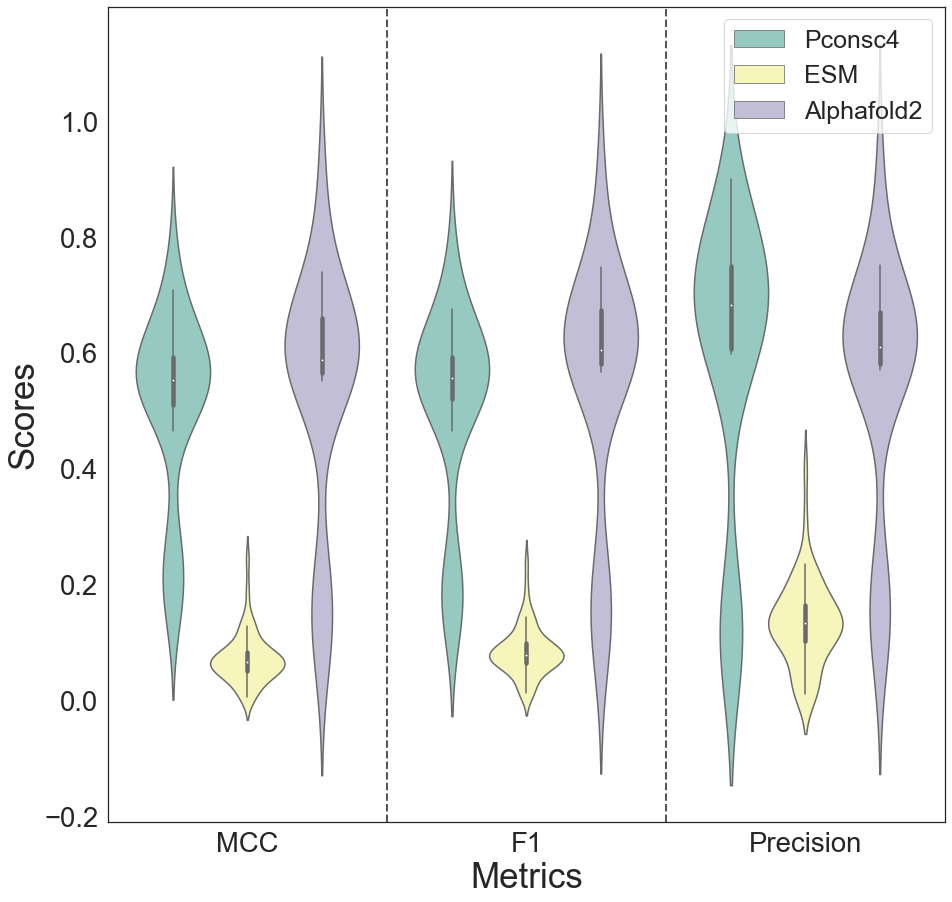

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("white")
fig = plt.figure(figsize=(15, 15))

#adjust_box_widths(fig, 1)
# Define order of x-axis variables
metric_order = [ 'MCC', 'F1','Precision']

# Define order of hue variable (methods)
#hue_order = df_all_results['Method'].unique()
hue_order=['Pconsc4','ESM','Alphafold2']
# Create figure


# Create boxplot using seaborn
ax=sns.violinplot(x='variable', y='value', hue='Method', data=pd.melt(df_all_results[['Method', 'Precision', 'MCC', 'F1']], id_vars=['Method']), order=metric_order, palette="Set3", hue_order=hue_order,scale='width')

# Add vertical lines separating x-axis variables
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)

# Set labels and legend
ax.set_xlabel('Metrics', fontsize=35)
ax.set_ylabel('Scores', fontsize=35)
plt.legend(loc='upper right', fontsize=25)

# Show plot
plt.show()
fig.savefig(os.path.join('results',  'cmap_comparision1' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results',  'cmap_comparision1' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results',  'cmap_comparision1' + '.svg'), dpi=500, bbox_inches='tight')



In [75]:
np.min(df_all_results['MCC'])

0.007277086404887583

In [86]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define paths and files
results_path = "/Users/rohan/Desktop/DTI_setup/cmap_analysis"


# Define a function to calculate precision at a distance cutoff
def calculate_precision(gt, contact_map, dist_cutoff):
    L = gt.shape[0]
    gt_contacts = set([(i, j) for i in range(L) for j in range(i+1, L) if abs(i-j) <= dist_cutoff])
    contact_map_contacts = set([(i, j) for i in range(L) for j in range(i+1, L) if contact_map[i,j] > 0])
    true_positives = len(gt_contacts.intersection(contact_map_contacts))
    false_positives = len(contact_map_contacts - gt_contacts)
    precision = true_positives / (true_positives + false_positives)
    return precision


# Define lists to store the results for each method
methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4"]

all_results = []

# Define the distance cutoffs for short, medium, and long-range contacts
dist_cutoffs = [6, 12, 24]

# Iterate over each method
for method in methods:
    method_precisions = {f"Precision@{cutoff}": [] for cutoff in dist_cutoffs}
    for file in filenames:
        # Load the contact maps
        gt = np.load(results_path + "/gt/" + file)
        contact_map = np.load(results_path + "/" + method + "/" + file)
        if method=="pconsc4":
            contact_map =contact_map  >= 0.5
            contact_map =np.multiply(contact_map,1)
        
        # Crop the contact map to match the size of the ground truth
        min_shape = min(gt.shape, contact_map.shape)
        gt = gt[:min_shape[0], :min_shape[1]]
        contact_map = contact_map[:min_shape[0], :min_shape[1]]

        # Calculate the precision at each distance cutoff
        for cutoff in dist_cutoffs:
            precision = calculate_precision(gt, contact_map, cutoff)
            method_precisions[f"Precision@{cutoff}"].append(precision)

    # Save the results in a dataframe
    df = pd.DataFrame({
        "Method": [method]*len(filenames),
        "File": filenames,
        **method_precisions
    })

    # Append the dataframe to the list of all results
    all_results.append(df)

# Concatenate all dataframes into a single dataframe
df_all_results1 = pd.concat(all_results)


In [87]:
df_all_results1

,Method,File,Precision@6,Precision@12,Precision@24
0,alpha_fold_cmaps,P15056.npy,0.695986,0.754056,0.813834
1,alpha_fold_cmaps,Q9H2G2.npy,0.667189,0.724354,0.787784
2,alpha_fold_cmaps,P43403.npy,0.675285,0.731559,0.798479
3,alpha_fold_cmaps,Q13546.npy,0.697778,0.758222,0.816000
4,alpha_fold_cmaps,P37023.npy,0.650179,0.718280,0.782079
...,...,...,...,...,...
45,pconsc4,P00519.npy,0.850225,0.898649,0.940315
46,pconsc4,P28482.npy,0.765957,0.812310,0.880699
47,pconsc4,O75385.npy,0.834043,0.873404,0.930851
48,pconsc4,Q00535.npy,0.752727,0.810909,0.881818


In [81]:
df_all_results1['Method'].replace({"alpha_fold_cmaps": "Alphafold2", "esm_cmaps": "ESM", "pconsc4": "Pconsc4"}, inplace=True)


<AxesSubplot:xlabel='variable', ylabel='value'>

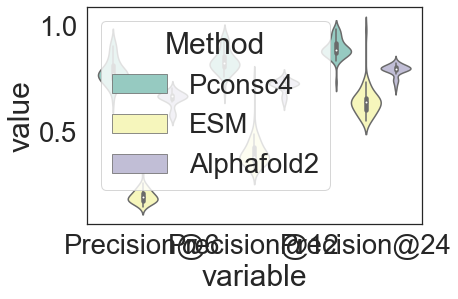

In [83]:
sns.violinplot(x='variable', y='value', hue='Method', data=pd.melt(df_all_results1[['Method'] + metric_order], id_vars=['Method']), 
               order=metric_order, palette="Set3", hue_order=hue_order, scale='width')

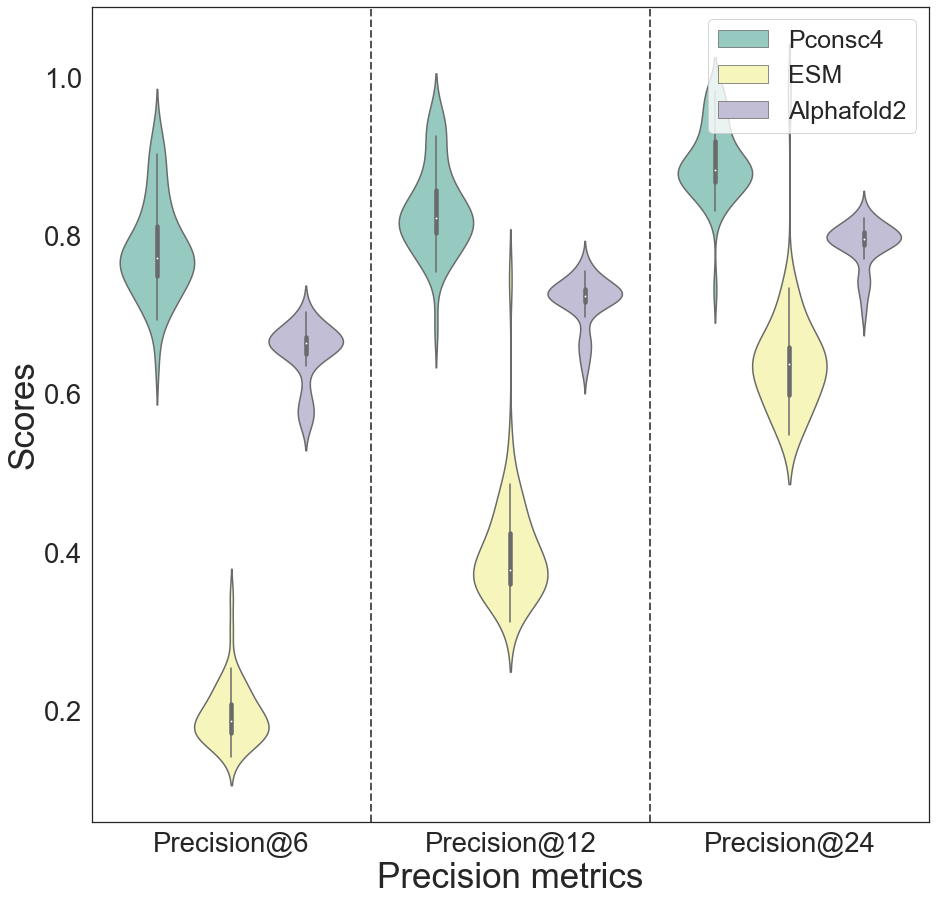

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("white")
fig = plt.figure(figsize=(15, 15))

# Define order of x-axis variables
dist_cutoffs = [6, 12, 24]
metric_order = [f"Precision@{cutoff}" for cutoff in dist_cutoffs]

# Define order of hue variable (methods)

hue_order=['Pconsc4','ESM','Alphafold2']
# Create figure
# fig, ax = plt.subplots(figsize=(10, 8))

# Create violin plot using seaborn
ax=sns.violinplot(x='variable', y='value', hue='Method', data=pd.melt(df_all_results1[['Method'] + metric_order], id_vars=['Method']), 
               order=metric_order, palette="Set3", hue_order=hue_order, scale='width')

# Add vertical lines separating x-axis variables
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)

# Set labels and legend
ax.set_xlabel('Precision metrics', fontsize=35)
ax.set_ylabel('Scores', fontsize=35)
plt.legend(loc='upper right', fontsize=25)

# Show plot
plt.show()

# Save plot
fig.savefig(os.path.join('results', 'cmap_comparison4.png'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join('results', 'cmap_comparison4.pdf'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join('results', 'cmap_comparison4.svg'), dpi=300, bbox_inches='tight')


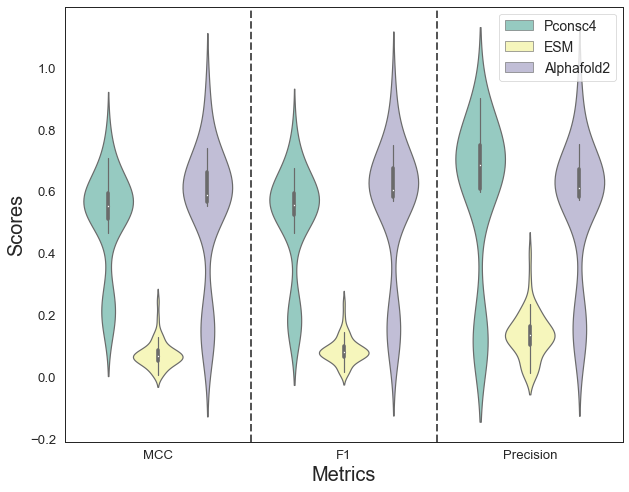

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)

# Define order of x-axis variables
metric_order = ['MCC', 'F1', 'Precision']

# Define order of hue variable (methods)
hue_order = ['Pconsc4', 'ESM', 'Alphafold2']

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create violin plot using seaborn
ax=sns.violinplot(x='variable', y='value', hue='Method', data=pd.melt(df_all_results[['Method', 'Precision', 'MCC', 'F1']], id_vars=['Method']), 
               order=metric_order, palette="Set3", hue_order=hue_order, scale='width', ax=ax)

# Add vertical lines separating x-axis variables
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)

# Set labels and legend
ax.set_xlabel('Metrics', fontsize=20)
ax.set_ylabel('Scores', fontsize=20)
plt.legend(loc='upper right', fontsize=14)

# Show plot
plt.show()

# Save plot
fig.savefig(os.path.join('results', 'cmap_comparison.png'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join('results', 'cmap_comparison.pdf'), dpi=300, bbox_inches='tight')
fig.savefig(os.path.join('results', 'cmap_comparison.svg'), dpi=300, bbox_inches='tight')


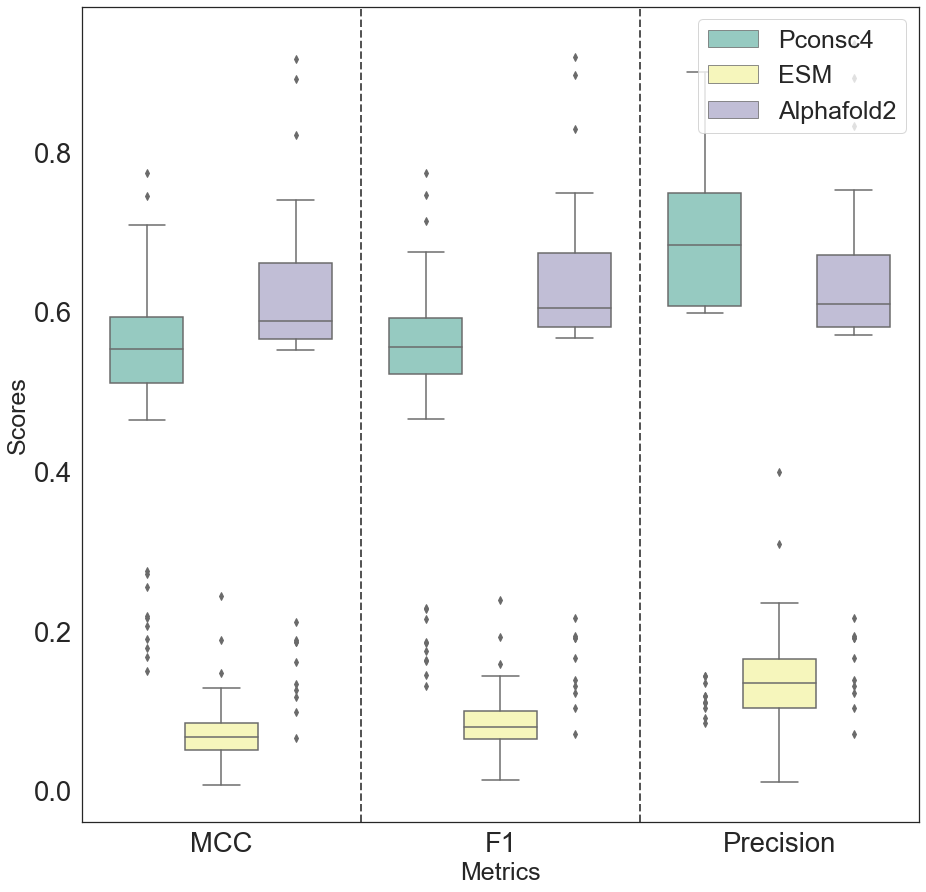

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("white")
fig = plt.figure(figsize=(15, 15))

#adjust_box_widths(fig, 1)
# Define order of x-axis variables
metric_order = [ 'MCC', 'F1','Precision']

# Define order of hue variable (methods)
#hue_order = df_all_results['Method'].unique()
hue_order=['Pconsc4','ESM','Alphafold2']
# Create figure


# Create boxplot using seaborn
ax=sns.boxplot(x='variable', y='value', hue='Method', data=pd.melt(df_all_results[['Method', 'Precision', 'MCC', 'F1']], id_vars=['Method']), order=metric_order, palette="Set3", hue_order=hue_order)

# Add vertical lines separating x-axis variables
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)

# Set labels and legend
ax.set_xlabel('Metrics', fontsize=25)
ax.set_ylabel('Scores', fontsize=25)
plt.legend(loc='upper right', fontsize=25)

# Show plot
plt.show()
fig.savefig(os.path.join('results',  'cmap_comparision2' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results',  'cmap_comparision2' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results',  'cmap_comparision2' + '.svg'), dpi=500, bbox_inches='tight')



In [ ]:
fig = plt.figure(figsize=(15, 15))

adjust_box_widths(fig, 1.2)
metric_order = [ 'MCC', 'F1','Precision']
hue_order=['Pconsc4','ESM','Alphafold2','Random']
hue_order=['Pconsc4','ESM','Alphafold2','Random']
order = ['MCC', 'F1','Precision']


ax =  sns.boxplot(x='variable', y='value',hue='cmap', data=df_melted7, order=order,palette="Set2",  hue_order=hue_order)
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)
ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)

plt.legend(loc='lower left',fontsize=35)

# fig.savefig(os.path.join('results_new',  'davis_proteins2d' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'davis_proteins2d' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'davis_proteins2d' + '.svg'), dpi=500, bbox_inches='tight')


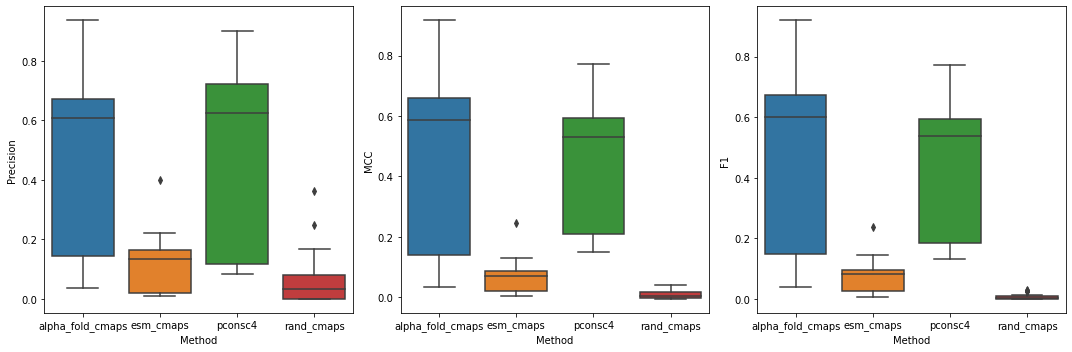

In [14]:
# Plot the boxplots for each method on all three metrics
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.boxplot(x="Method", y="Precision", data=df_all_results, ax=axs[0])
sns.boxplot(x="Method", y="MCC", data=df_all_results, ax=axs[1])
sns.boxplot(x="Method", y="F1", data=df_all_results, ax=axs[2])
fig.tight_layout()
plt.show()

In [12]:
for method in ["alpha_fold_cmaps", "esm_cmaps", "pconsc4", "rand_cmaps"]:
    method_f1 = []
    method_mcc = []
    method_precision = []
    for file in files:
        # Load the contact maps
        gt = np.load(results_path + "/gt/" + file)
        contact_map = np.load(results_path + "/" + method + "/" + file)
        if method=="pconsc4":
            contact_map =contact_map  >= 0.5
            contact_map =np.multiply(contact_map,1)
        min_shape = min(gt.shape, contact_map.shape)
        gt = gt[:min_shape[0], :min_shape[1]]
        contact_map= contact_map[:min_shape[0], :min_shape[1]]

        # Compare the contact maps
        mcc, f1,precision = calculate_metrics(gt,contact_map)
        method_f1.append(true_contacts)
        method_mcc.append(mcc)
        method_precision.append(precision)


  
    avg_f1 = np.mean(method_f1)
    avg_mcc = np.mean(method_mcc)
    avg_precision = np.mean(method_precision)
    
#     # Print the results
#     print("Method:", method)
#     print("Average f1 compared to groundtruth:", avg_true_contacts)
#     print("Average mcc compared to groundtruth:", avg_mcc)  
#     print("Average precision compared to groundtruth:",avg_precision)
#     print("Average prec_L_10 compared to groundtruth:",avg_prec_L_10)
#     print("Average prec_L_5 compared to groundtruth:", avg_prec_L_5)
#     print("Average prec_L_2 compared to groundtruth:", prec_L_2)
   
    


Method: alpha_fold_cmaps
Average percentage of true contacts compared to groundtruth: 0.17480790706268604
Average mcc compared to groundtruth: 0.16957204874640203
Average precision compared to groundtruth: 0.17480790706268604
Average prec_L_10 compared to groundtruth: 0.15805931068079407
Average prec_L_5 compared to groundtruth: 0.1515434896651046
Average prec_L_2 compared to groundtruth: 0.15966386554621848
Method: esm_cmaps
Average percentage of true contacts compared to groundtruth: 0.06653157143472507
Average mcc compared to groundtruth: 0.042573500075522484
Average precision compared to groundtruth: 0.03832089259471668
Average prec_L_10 compared to groundtruth: 0.05977146183769612
Average prec_L_5 compared to groundtruth: 0.04766542062482982
Average prec_L_2 compared to groundtruth: 0.018518518518518517
Method: pconsc4
Average percentage of true contacts compared to groundtruth: 0.45142910109346124
Average mcc compared to groundtruth: 0.22796002784766406
Average precision compared

/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_59100/674676682.py:3: RuntimeWarning: invalid value encountered in long_scalars
  prec_L_10 = np.sum(np.logical_and(contact_map[:L//10, :L//10] == 1, gt[:L//10, :L//10] == 1)) / np.sum(contact_map[:L//10, :L//10] == 1)
/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_59100/674676682.py:3: RuntimeWarning: invalid value encountered in long_scalars
  prec_L_10 = np.sum(np.logical_and(contact_map[:L//10, :L//10] == 1, gt[:L//10, :L//10] == 1)) / np.sum(contact_map[:L//10, :L//10] == 1)
/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_59100/674676682.py:4: RuntimeWarning: invalid value encountered in long_scalars
  prec_L_5 = np.sum(np.logical_and(contact_map[:L//5, :L//5] == 1, gt[:L//5, :L//5] == 1)) / np.sum(contact_map[:L//5, :L//5] == 1)
/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_59100/674676682.py:5: RuntimeWarning: invalid value encountered in long_scalars
  prec_L_2 = np.sum(np.logical_and

Method: rand_cmaps
Average percentage of true contacts compared to groundtruth: 0.006518263871205048
Average mcc compared to groundtruth: 0.005009358752536475
Average precision compared to groundtruth: 0.009183673469387754
Average prec_L_10 compared to groundtruth: nan
Average prec_L_5 compared to groundtruth: nan
Average prec_L_2 compared to groundtruth: 0.03546099290780142


/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_59100/674676682.py:3: RuntimeWarning: invalid value encountered in long_scalars
  prec_L_10 = np.sum(np.logical_and(contact_map[:L//10, :L//10] == 1, gt[:L//10, :L//10] == 1)) / np.sum(contact_map[:L//10, :L//10] == 1)


In [ ]:
results = {'Alphafold2': [ 0.1696, 0.1748, 0.1581, 0.1515, 0.1597],
           'ESM': [ 0.0426, 0.0383, 0.0598, 0.0477, 0.0185],
           'Pconsc4': [0.2280, 0.1242, 0.1165, 0.1117, 0.0769],
           'Random': [0.0050, 0.0092, 0.001, 0.001, 0.0355]}
# convert dictionary to pandas dataframe
df = pd.DataFrame(results)

# set the order of methods and metrics
method_order = [ 'Pconsc4','ESM','Alphafold2', 'Random']
metric_order = ['MCC',  'Precision (L)', 'Precison (L/10)', 'Precision (L/5)', 'Precision (L/2)']

# melt dataframe to plot
df_melted = pd.melt(df, value_vars=method_order, var_name='method', value_name='score')
df_melted['metric'] = metric_order * len(method_order)

# plot bar plot
sns.set_style("whitegrid")
sns.catplot(x='metric', y='score', hue='method', data=df_melted, kind='bar', palette='Set2', legend=False, height=6, aspect=2)
sns.despine(left=True)

# set legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# set axis labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
#plt.title('Performance of contact map prediction methods')

# show plot
plt.show()

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def get_precision(true_contact_map, predicted_contact_map, top_lk):
    n = true_contact_map.shape[0]
    contact_type = np.zeros(n * n)
    for i in range(n):
        for j in range(i+6, min(i+11, n)):
            contact_type[i*n+j] = 1  # short-range contact
            contact_type[j*n+i] = 1
        for j in range(i+12, min(i+23, n)):
            contact_type[i*n+j] = 2  # medium-range contact
            contact_type[j*n+i] = 2
        for j in range(i+24, n):
            contact_type[i*n+j] = 3  # long-range contact
            contact_type[j*n+i] = 3
    
    # flatten contact map matrices
    true_contact_flat = true_contact_map.flatten()
    predicted_contact_flat = predicted_contact_map.flatten()
    contact_type_flat = contact_type.flatten()
    
    # get top L/k predicted contacts
    top_lk_indices = np.argsort(predicted_contact_flat)[::-1][:int(n/top_lk)]
    top_lk_contacts = contact_type_flat[top_lk_indices]
    
    # calculate precision for short, medium, and long-range contacts
    precision = {}
    for ct in [1, 2, 3]:
        ct_indices = np.where(top_lk_contacts == ct)[0]
        ct_true = np.where(contact_type_flat == ct)[0]
        num_true_ct = len(ct_true)
        if num_true_ct == 0:
            precision[ct] = len(ct_indices) / int(n/top_lk)
        else:
            num_pred_ct = len(ct_indices)
            num_correct_ct = len(np.intersect1d(ct_indices, ct_true))
            precision[ct] = num_correct_ct / num_pred_ct
    
    return precision


# # Example usage
# true_contact_map = np.random.randint(0, 2, size=(100, 100))
# predicted_contact_map = np.random.rand(100, 100)

# methods = ['alphafold', 'esm', 'pconsc4', 'random']
# results = {}
# for method in methods:
#     # replace with your function to get predicted contact maps
#     predicted_contact_map = get_predicted_contact_map(method)
    
#     # calculate precision at top L/k for short, medium, and long-range contacts
#     precision = {}
#     for lk in [10, 5, 2, 1]:
#         top_lk = int(true_contact_map.shape[0] / lk)
#         precision[lk] = get_precision(true_contact_map, predicted_contact_map, top_lk)
    
#     results[method] = precision

# # plot results as bar plot
# fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
# colors = ['tab:blue', 'tab:orange


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of methods
methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4", "rand_cmaps"]

# Define the list of L/k values
lk_values = [1, 2, 5, 10]

# Initialize a dictionary to store the precision results
precision_results = {}

# Loop through each method and compute the precision for each L/k value
for method in methods:
    method_precisions = {}
    for lk in lk_values:
        top_lk = int(gt.shape[0] / lk)
        precision = get_precision(gt, contact_map, top_lk)
        method_precisions[lk] = precision
    precision_results[method] = method_precisions


In [61]:
def get_precision(true_contact_map, predicted_contact_map, top_lk):
    n = true_contact_map.shape[0]
    contact_type = np.zeros(n * n)
    for i in range(n):
        for j in range(i+6, min(i+11, n)):
            contact_type[i*n+j] = 1  # short-range contact
            contact_type[j*n+i] = 1
        for j in range(i+12, min(i+23, n)):
            contact_type[i*n+j] = 2  # medium-range contact
            contact_type[j*n+i] = 2
        for j in range(i+24, n):
            contact_type[i*n+j] = 3  # long-range contact
            contact_type[j*n+i] = 3
    
    # flatten contact map matrices
    true_contact_flat = true_contact_map.flatten()
    predicted_contact_flat = predicted_contact_map.flatten()
    contact_type_flat = contact_type.flatten()
    
    # get top L/k predicted contacts
    top_lk_indices = np.argsort(predicted_contact_flat)[::-1][:int(n/top_lk)]
    top_lk_contacts = contact_type_flat[top_lk_indices]
    
    # calculate precision for short, medium, and long-range contacts
    precision = {}
    for ct in [1, 2, 3]:
        ct_indices = np.where(top_lk_contacts == ct)[0]
        ct_true = np.where(contact_type_flat == ct)[0]
        num_true_ct = len(ct_true)
        if num_true_ct == 0:
            precision[ct] = len(ct_indices) / int(n/top_lk)
        else:
            num_pred_ct = len(ct_indices)
            if num_pred_ct == 0:
                precision[ct] = 0
            else:
                num_correct_ct = len(np.intersect1d(ct_indices, ct_true))
                precision[ct] = num_correct_ct / num_pred_ct
    
    return precision


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of methods to evaluate
methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4", "rand_cmaps"]

# Define a list of file names to iterate over
#files = ["example1.npz", "example2.npz", ..., "example10.npz"]

# Define a dictionary to store the precision results for each method
precision_dict = {}

# Iterate over the files
for file in files:
    print(file)
    # Define a dictionary to store the precision results for each method and each L/k value
    file_precision_dict = {}
    for method in methods:
        # Load the contact maps
        gt = np.load(results_path + "/gt/" + file)
        contact_map = np.load(results_path + "/" + method + "/" + file)
        if method == "pconsc4":
            contact_map = contact_map >= 0.5
            contact_map = np.multiply(contact_map, 1)
        min_shape = min(gt.shape, contact_map.shape)
        gt = gt[:min_shape[0], :min_shape[1]]
        contact_map = contact_map[:min_shape[0], :min_shape[1]]
        
        # Calculate precision at top L/k for short, medium, and long-range contacts
        precision_dict[method] = {}
        for lk in [1, 2, 5, 10]:
            top_lk = int(gt.shape[0] / lk)
            precision_dict[method][lk] = get_precision(gt, contact_map, top_lk)

        # Store the precision results for this file and method
        file_precision_dict[method] = precision_dict[method]

    # If this is the first file, create the overall precision dictionary
    if len(precision_dict) == 0:
        precision_dict = file_precision_dict
    # Otherwise, update the overall precision dictionary with the new results
    else:
        for method in methods:
            for lk in [1, 2, 5, 10]:
                for ct in [1, 2, 3]:
                    precision_dict[method][lk][ct] += file_precision_dict[method][lk][ct]

# Divide the precision values by the number of example files to get the average precision
num_files = len(files)
for method in methods:
    for lk in [1, 2, 5, 10]:
        for ct in [1, 2, 3]:
            precision_dict[method][lk][ct] /= num_files



P19784.npy
P24941.npy
P50750.npy
Q16539.npy
P06493.npy
Q00535.npy
O43741.npy


In [67]:
precision_dict 

{'alpha_fold_cmaps': {1: {1: 0.0, 2: 0.0, 3: 0.0},
  2: {1: 0.0, 2: 0.0, 3: 0.0},
  5: {1: 0.0, 2: 0.0, 3: 0.0},
  10: {1: 0.0, 2: 0.0, 3: 0.0}},
 'esm_cmaps': {1: {1: 0.0, 2: 0.0, 3: 0.0},
  2: {1: 0.0, 2: 0.0, 3: 0.0},
  5: {1: 0.0, 2: 0.0, 3: 0.0},
  10: {1: 0.14285714285714285, 2: 0.0, 3: 0.0}},
 'pconsc4': {1: {1: 0.0, 2: 0.0, 3: 0.0},
  2: {1: 0.0, 2: 0.0, 3: 0.0},
  5: {1: 0.0, 2: 0.0, 3: 0.0},
  10: {1: 0.0, 2: 0.0, 3: 0.0}},
 'rand_cmaps': {1: {1: 0.0, 2: 0.0, 3: 0.0},
  2: {1: 0.0, 2: 0.0, 3: 0.0},
  5: {1: 0.0, 2: 0.0, 3: 0.0},
  10: {1: 0.21428571428571427, 2: 0.0, 3: 0.0}}}

In [ ]:
# Create the bar plot
short_range_precision = [precision_dict[method][lk][1] for method in methods for lk in [1, 2, 5, 10]]
medium_range_precision = [precision_dict[method][lk][2] for method in methods for lk in [1, 2, 5, 10]]
long_range_precision = [precision_dict[method][lk][3] for method in methods for lk in [1, 2, 5, 10]]
range_labels = ["Short-range", "Medium-range", "Long-range"]
lk_labels = ["L", "L/2", "L/5", "L/10"]
method_labels = [method.replace("_", " ").title() for method in methods for _ in range(4)]

fig, axs = plt.subplots(ncols=3, figsize=(12, 5))
sns.barplot(x=lk_labels*len(methods), y=short_range_precision+


In [43]:
method_mcc

[-0.003969852581141715,
 -0.0008723230173131455,
 0.0,
 -0.001137317921001674,
 0.01995643725669049,
 -0.001334137292216033,
 0.0224227048227374]

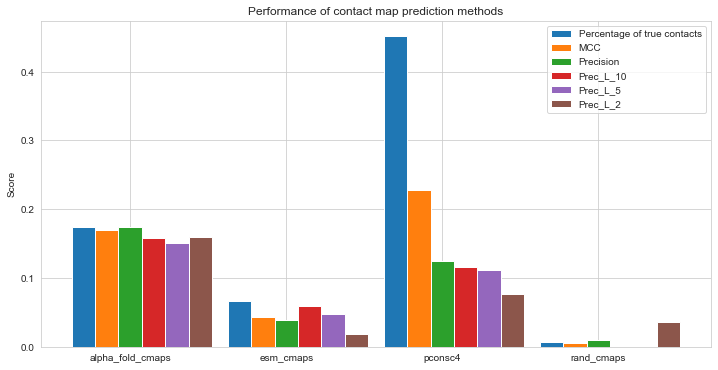

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# data
methods = ['alpha_fold_cmaps', 'esm_cmaps', 'pconsc4', 'rand_cmaps']
metrics = ['Percentage of true contacts', 'MCC', 'Precision', 'Prec_L_10', 'Prec_L_5', 'Prec_L_2']


# create plot
x = np.arange(len(methods))
width = 0.15
fig, ax = plt.subplots(figsize=(12,6))
colors = ['red', 'green', 'blue', 'orange']
for i in range(len(metrics)):
    ax.bar(x + (i-2)*width, [results[method][i] for method in methods], width, label=metrics[i])

# add labels and legend
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.set_ylabel('Score')
ax.set_title('Performance of contact map prediction methods')
ax.legend()

plt.show()


In [38]:
sns.set(font_scale = 1.5,style="white")

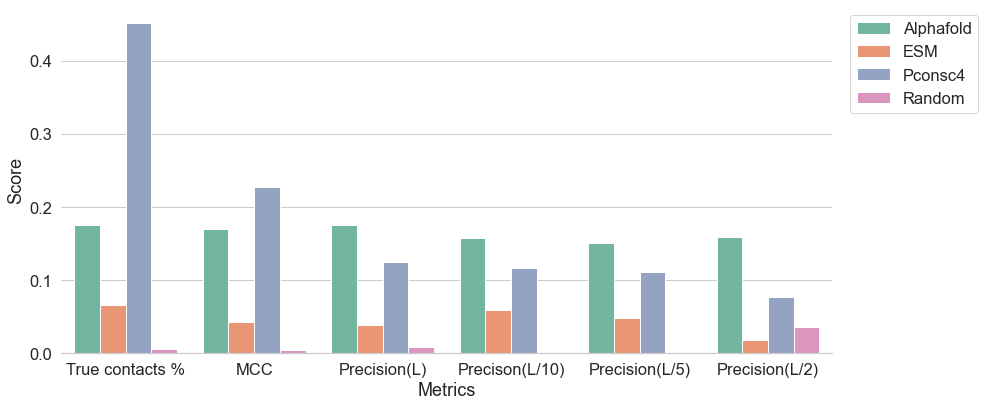

In [41]:
import seaborn as sns
import pandas as pd

results = {'Alphafold': [0.1748, 0.1696, 0.1748, 0.1581, 0.1515, 0.1597],
           'ESM': [0.0665, 0.0426, 0.0383, 0.0598, 0.0477, 0.0185],
           'Pconsc4': [0.4514, 0.2280, 0.1242, 0.1165, 0.1117, 0.0769],
           'Random': [0.0065, 0.0050, 0.0092, 0.001, 0.001, 0.0355]}
# convert dictionary to pandas dataframe
df = pd.DataFrame(results)

# set the order of methods and metrics
method_order = ['Alphafold', 'ESM', 'Pconsc4', 'Random']
metric_order = ['True contacts %','MCC',  'Precision(L)', 'Precison(L/10)', 'Precision(L/5)', 'Precision(L/2)']

# melt dataframe to plot
df_melted = pd.melt(df, value_vars=method_order, var_name='method', value_name='score')
df_melted['metric'] = metric_order * len(method_order)

# plot bar plot
sns.set_style("whitegrid")
sns.catplot(x='metric', y='score', hue='method', data=df_melted, kind='bar', palette='Set2', legend=False, height=6, aspect=2)
sns.despine(left=True)

# set legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# set axis labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
#plt.title('Performance of contact map prediction methods')

# show plot
plt.show()


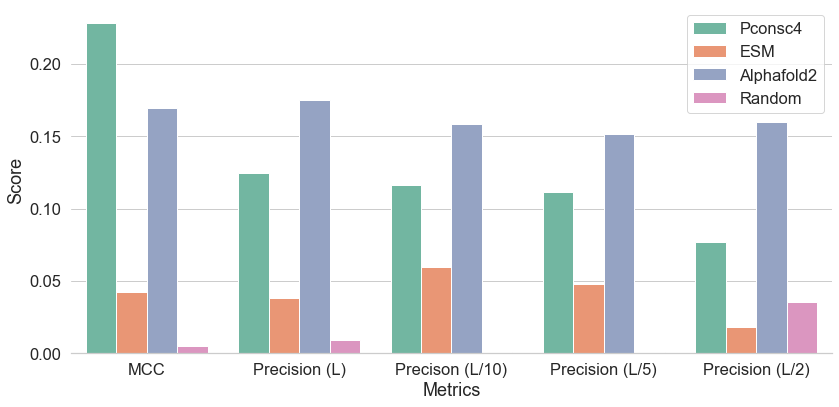

In [48]:
import seaborn as sns
import pandas as pd

results = {'Alphafold2': [ 0.1696, 0.1748, 0.1581, 0.1515, 0.1597],
           'ESM': [ 0.0426, 0.0383, 0.0598, 0.0477, 0.0185],
           'Pconsc4': [0.2280, 0.1242, 0.1165, 0.1117, 0.0769],
           'Random': [0.0050, 0.0092, 0.001, 0.001, 0.0355]}
# convert dictionary to pandas dataframe
df = pd.DataFrame(results)

# set the order of methods and metrics
method_order = [ 'Pconsc4','ESM','Alphafold2', 'Random']
metric_order = ['MCC',  'Precision (L)', 'Precison (L/10)', 'Precision (L/5)', 'Precision (L/2)']

# melt dataframe to plot
df_melted = pd.melt(df, value_vars=method_order, var_name='method', value_name='score')
df_melted['metric'] = metric_order * len(method_order)

# plot bar plot
sns.set_style("whitegrid")
sns.catplot(x='metric', y='score', hue='method', data=df_melted, kind='bar', palette='Set2', legend=False, height=6, aspect=2)
sns.despine(left=True)

# set legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# set axis labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
#plt.title('Performance of contact map prediction methods')

# show plot
plt.show()
